In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cmap_name = 'my_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=6)

In [3]:
#df = pd.read_csv("CP800_initial_IMM_nano_2_ebsd_output.txt",sep='\t')
df = pd.read_csv("CP800_initial_3rd_RD_ND_EP_ebsd_output.txt",sep='\t')

In [4]:
print(df.shape)
print(df['X'].max() *10, df['Y'].max() *10)
df.head(30)

(274999, 10)
499.0 549.0


,X,Y,Phase,Euler_1,Euler_2,Euler_3,grainId_5deg,GrainAverIQ,GOS,KAM
0,0.0,0.0,2,35.4424,39.8160,84.1377,50,171.793,1.214010,0.211825
1,0.1,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.214010,0.121266
2,0.2,0.0,2,35.5728,39.9170,83.9942,50,171.793,1.214010,0.173771
3,0.3,0.0,2,35.7172,40.0082,83.7871,50,171.793,1.214010,0.174090
4,0.4,0.0,2,35.9219,39.9634,83.5319,50,171.793,1.214010,0.156292
5,0.5,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.214010,0.180774
6,0.6,0.0,2,36.0948,39.9888,83.4317,50,171.793,1.214010,0.258827
7,0.7,0.0,2,36.4162,40.0702,83.0903,50,171.793,1.214010,0.332431
8,0.8,0.0,2,36.5809,40.2690,82.8881,50,171.793,1.214010,0.357082
9,0.9,0.0,2,36.9288,40.4713,82.4151,50,171.793,1.214010,0.342560


In [5]:
data_to_show = df[['X', 'Y', 'Phase', 'grainId_5deg']]
print('Phases: ', np.sort(data_to_show['Phase'].unique()))

del df
data_to_show.head(10)

Phases:  [1 2 3]


,X,Y,Phase,grainId_5deg
0,0.0,0.0,2,50
1,0.1,0.0,2,50
2,0.2,0.0,2,50
3,0.3,0.0,2,50
4,0.4,0.0,2,50
5,0.5,0.0,2,50
6,0.6,0.0,2,50
7,0.7,0.0,2,50
8,0.8,0.0,2,50
9,0.9,0.0,2,50


In [6]:
def make_image(row_range, col_range, values):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            image_tab[i][j] = values[i * (col_range+1) + j]
    
    return image_tab

In [7]:
## test ##
sq =[[0,0], [0,1], [0,2], [0,3],
     [1,0], [1,1], [1,2], [1,3],
     [2,0], [2,1], [2,2], [2,3],
     [3,0], [3,1], [3,2], [3,3]]
sq_df = pd.DataFrame(np.array(sq), columns=['Y', 'X'])
color = [1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 3, 3, 4, 4]
sq_df

,Y,X
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


In [8]:
## test ##
image_sq = make_image(sq_df['Y'].max(), sq_df['X'].max(), np.array(color))

4 4


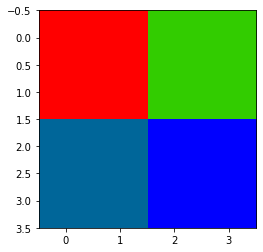

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [9]:
## test ##
plt.rcParams['figure.figsize'] = [4, 4]
plt.imshow(image_sq, cmap=cmap)
plt.show()
print(image_sq)

In [10]:
image_matrix = make_image(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), data_to_show['Phase'].to_numpy())

550 500


In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

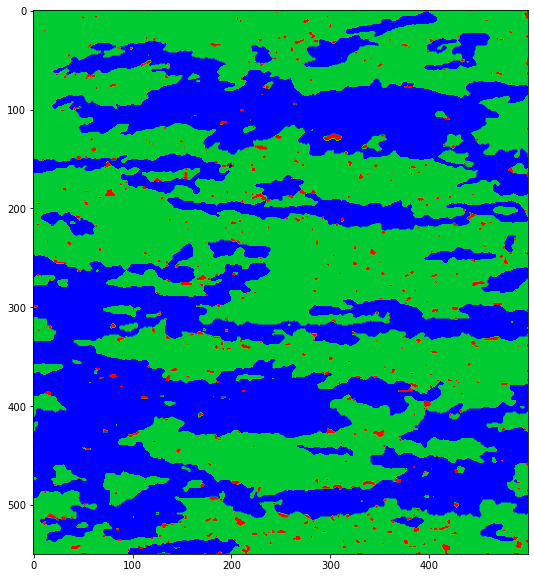

In [12]:
plt.imshow(image_matrix, cmap=cmap)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

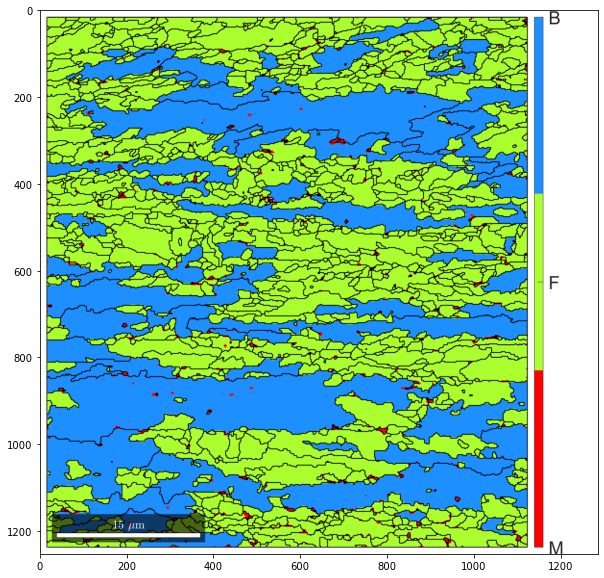

In [13]:
from PIL import Image

im = Image.open('Phase map.tif')
plt.imshow(im)
plt.show

In [14]:
def display_grain_on_image(input_tab, grains, grain_number):
    output_tab = np.copy(input_tab)
    
    print(input_tab.shape[0], input_tab.shape[1])
    
    for i in range((input_tab.shape[0]) * (input_tab.shape[1]) - grains.shape[0]):
        grains = np.concatenate((grains, [grains[-1]]))
    
    for i in range(input_tab.shape[0]):
        for j in range(input_tab.shape[1]):
            
            if(grains[i * input_tab.shape[1] + j] == grain_number):
                output_tab[i][j] = 0
    
    return output_tab

In [15]:
grain_image_matrix = display_grain_on_image(image_matrix, data_to_show['grainId_5deg'].to_numpy(), 50)

550 500


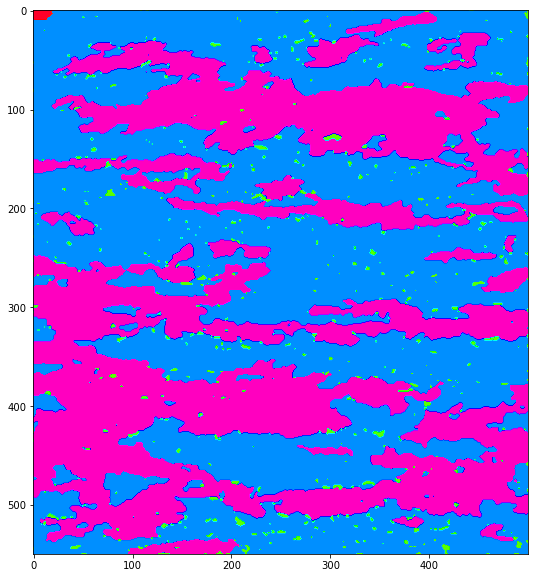

In [16]:
plt.imshow(grain_image_matrix, cmap=cm.get_cmap('gist_rainbow'))
plt.show()

In [17]:
def image_binarization_by_grain(row_range, col_range, values, phase):
    image_tab = np.zeros((row_range+1, col_range+1))
    
    print(row_range+1, col_range+1)
    
    for i in range((row_range+1) * (col_range+1) - values.shape[0]):
        values = np.concatenate((values, [values[-1]]))
    
    
    for i in range(row_range+1):
        for j in range(col_range+1):
            
            if(values[i * (col_range+1) + j] == phase):
                image_tab[i][j] = 1
            else:
                image_tab[i][j] = 0
    
    return image_tab

In [18]:
phase_image_matrix = image_binarization_by_grain(int(data_to_show['Y'].max() *10), int(data_to_show['X'].max() *10), data_to_show['Phase'].to_numpy(), 3)

550 500


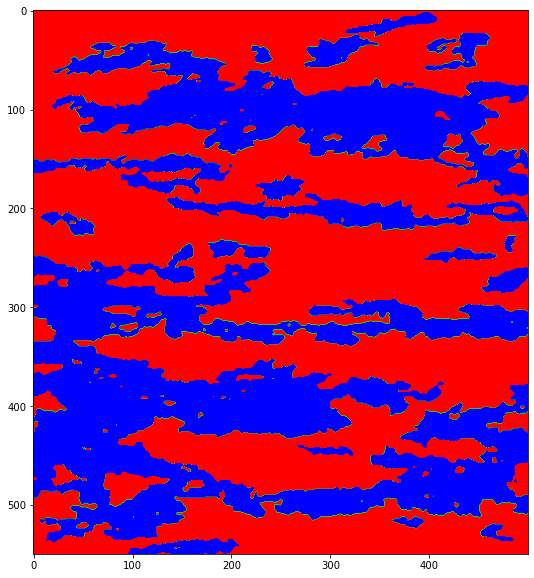

In [19]:
plt.imshow(phase_image_matrix, cmap=cmap)
plt.show()

In [20]:
def image_color_segmentation(input_tab, grains):
        output_tab = np.copy(input_tab)
        
        for i in range((input_tab.shape[0]+1) * (input_tab.shape[1]+1) - grains.shape[0]):
            grains = np.concatenate((grains, [grains[-1]]))
        
        
        for i in range(input_tab.shape[0]):
            for j in range(input_tab.shape[1]):
                output_tab[i][j] = np.remainder(grains[i * input_tab.shape[1] + j], 255)
        
        return output_tab / 255. #np.mod(grains, 255)/ 255.

In [21]:
segmentation_image_matrix = image_color_segmentation(image_matrix, data_to_show['grainId_5deg'].to_numpy())
segmentation_image_matrix = np.uint8(cm.gist_ncar(segmentation_image_matrix) *255)

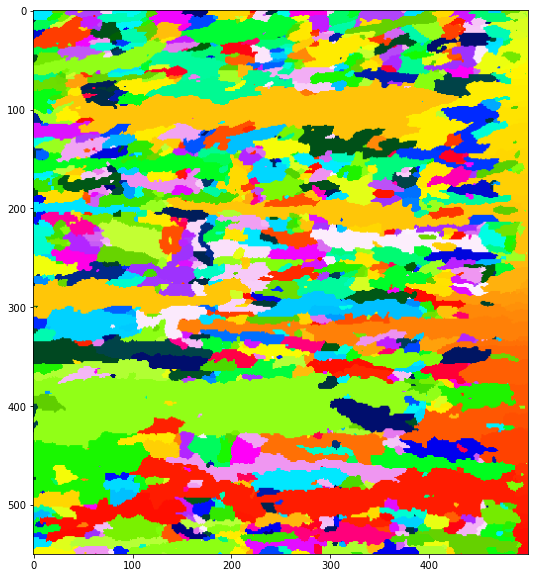

In [22]:
#del grain_image_matrix, phase_image_matrix

plt.imshow(segmentation_image_matrix)
plt.show()

In [23]:
grain1714 = data_to_show[data_to_show.grainId_5deg == 1714] # Phase: 2
pd.unique(grain1714.Phase)

array([3, 2, 1])

In [24]:
grain1387 = data_to_show[data_to_show.grainId_5deg == 1387] # Phase: 2
grain1686 = data_to_show[data_to_show.grainId_5deg == 1686] # Phase: 2

print(pd.unique(grain1387.Phase), pd.unique(grain1686.Phase))

[2 1 3] [2 1 3]


In [25]:
grains_df = pd.DataFrame({"Area": data_to_show['grainId_5deg'].value_counts()})

grains_df['Phase'] = list(map( lambda x: data_to_show.loc[data_to_show.grainId_5deg == x, 'Phase'].value_counts(sort=True).index[0],  grains_df.index))

grains_df.head(20)
# phase = data_to_show.loc[data_to_show.grainId_5deg == 1714, 'Phase'].value_counts(sort=True).index[0]
# phase
# print([*map( lambda x: data_to_show.loc[data_to_show.grainId_5deg == x, 'Phase'].value_counts(sort=True).index[0],  hist_list.index)])

,Area,Phase
1387,18906,3
1432,12662,3
1714,11278,3
1686,5275,3
1698,5234,3
338,4959,3
666,4688,3
1703,3123,3
1670,2814,3
1254,2792,2


<AxesSubplot:>

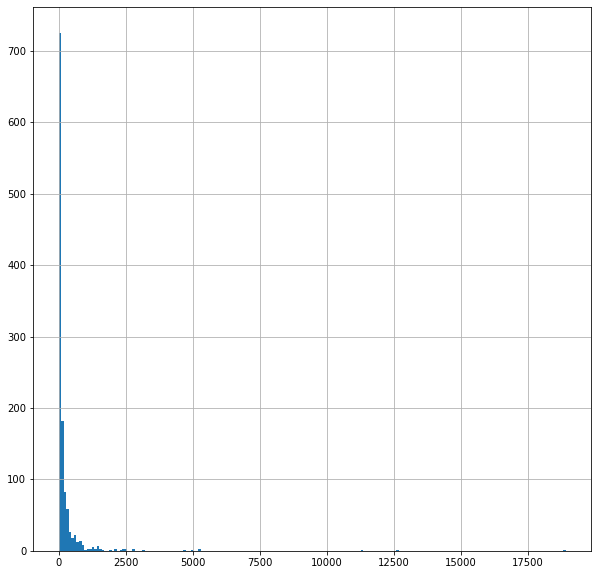

In [26]:
grains_df.loc[grains_df['Area'] > 2]['Area'].hist(bins=200)

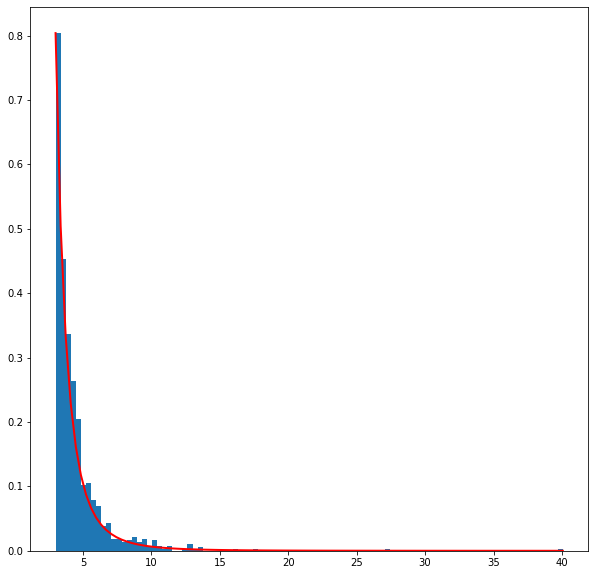

In [27]:
a, m = 3., 3.  # shape and mode
s = (np.random.pareto(a, 1000) + 1) * m

count, bins, _ = plt.hist(s, 100, density=True)
fit = a * m**a / bins **(a+1)
plt.plot(bins, max(count)*fit / max(fit), linewidth=2, color='r')
plt.show()

<AxesSubplot:>

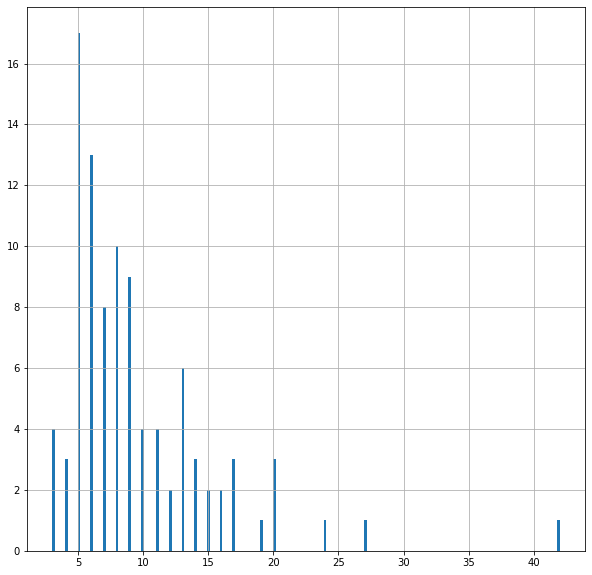

In [28]:
grains_df.loc[(grains_df['Phase'] == 1) & (grains_df['Area'] > 2)]['Area'].hist(bins=200)

<AxesSubplot:>

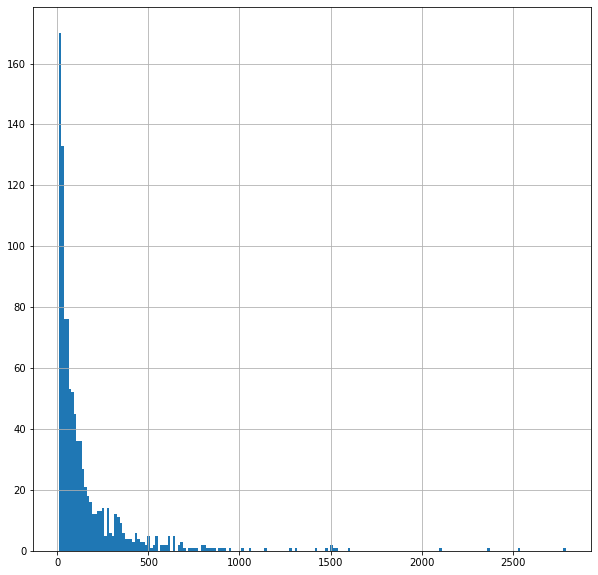

In [29]:
grains_df.loc[(grains_df['Phase'] == 2) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)

<AxesSubplot:>

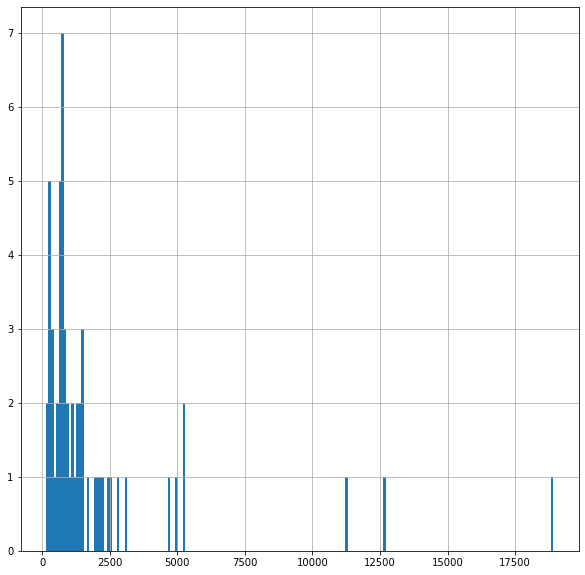

In [30]:
grains_df.loc[(grains_df['Phase'] == 3) & (grains_df['Area'] >= 8)]['Area'].hist(bins=200)

In [31]:
import cv2
from scipy import ndimage
from skimage import measure

grains = data_to_show['grainId_5deg'].values

for i in range((image_matrix.shape[0]) * (image_matrix.shape[1]) - grains.shape[0]):
    grains = np.concatenate((grains, [grains[-1]]))

tmp = grains.reshape(image_matrix.shape)
perimeter = []; major_axis = []; minor_axis = []; eccentricity = []; equivalent_diameter = []
X = [];  Y = []; #feret_diameter = []



for i in grains_df.index:
    
    mask = tmp == i
    labeled_mask, num_labels = ndimage.label(mask, structure=np.ones((3,3)))
    clusters = measure.regionprops(labeled_mask, tmp)
    
    perimeter.append(clusters[0].perimeter)
    Y.append(clusters[0].centroid[0])
    X.append(clusters[0].centroid[1])
    major_axis.append(clusters[0].major_axis_length)
    minor_axis.append(clusters[0].minor_axis_length)
    eccentricity.append(clusters[0].eccentricity)
    equivalent_diameter.append(clusters[0].equivalent_diameter)
    #feret_diameter.append(clusters[0].feret_diameter_max)
    
    
grains_df['Perimeter'] = perimeter
grains_df['y'] = Y
grains_df['x'] = X
grains_df['Major axis'] = major_axis
grains_df['Minor axis'] = minor_axis
grains_df['Zeta3/eccentricity'] = eccentricity #mimośród
#grains_df['Zeta7/Feret'] = feret_diameter

In [32]:
grains_df['Zeta1'] = 2 * (grains_df['Major axis'] + grains_df['Minor axis']) / grains_df['Perimeter']
grains_df['Zeta2'] = grains_df['Perimeter'] / (4 * np.sqrt(grains_df['Area']))
grains_df['Zeta4'] = grains_df['Perimeter'] / np.pi
grains_df['Zeta5'] = equivalent_diameter
grains_df['Zeta6'] = 2 * np.sqrt(np.pi * grains_df['Area']) / grains_df['Perimeter']
grains_df['Zeta7/Feret'] = grains_df['Major axis'] / grains_df['Minor axis'] ###

In [33]:
grains_df.head(20)

,Area,Phase,Perimeter,y,x,Major axis,Minor axis,Zeta3/eccentricity,Zeta1,Zeta2,Zeta4,Zeta5,Zeta6,Zeta7/Feret
1387,18906,3,1457.928066,399.574791,177.426637,427.079441,66.741309,0.987714,0.677428,2.650796,464.072917,155.151110,0.334325,6.399027
1432,12662,3,1241.146320,100.931290,241.879798,423.966014,46.677344,0.993921,0.758401,2.757477,395.069144,126.971489,0.321391,9.082908
1714,11278,3,1462.028571,487.618904,310.016670,460.685148,50.464710,0.993982,0.699234,3.441754,465.378148,119.831530,0.257493,9.128858
1686,5275,3,1098.193001,204.169668,328.246445,370.547193,27.445305,0.997253,0.724813,3.780136,349.565689,81.953271,0.234443,13.501296
1698,5234,3,926.854906,321.627627,349.008789,394.950598,23.302228,0.998258,0.902521,3.202837,295.027080,81.634158,0.276701,16.949048
338,4959,3,593.096500,459.959064,52.717282,123.533900,65.878133,0.845939,0.638722,2.105563,188.788480,79.460650,0.420898,1.875188
666,4688,3,624.652850,289.350469,90.915742,247.165817,33.215359,0.990929,0.897718,2.280788,198.833177,77.258961,0.388562,7.441311
1703,3123,3,517.404112,414.558117,437.576369,138.933038,37.329605,0.963227,0.681335,2.314642,164.694844,63.058125,0.382879,3.721792
1670,2814,3,495.469083,103.926439,428.527363,152.508683,41.234015,0.962756,0.782058,2.335041,157.712708,59.857298,0.379534,3.698613
1254,2792,2,627.274170,462.316619,260.701648,265.234974,23.416116,0.996095,0.920335,2.967835,199.667570,59.622855,0.298611,11.327027
